In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from math import sqrt

df1990 = pd.read_csv(r"C:\Users\mathe\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df1990

c:\Users\mathe\Documents\Vscode\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [24]:
df2000 = pd.read_csv(r'C:\Users\mathe\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df2012 = pd.read_csv(r"C:\Users\mathe\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df2015 = pd.read_csv(r"C:\Users\mathe\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df2017 = pd.read_csv(r"C:\Users\mathe\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [23]:
print(df1990.info())
print(df1990.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04

In [25]:
print(df2000.info())
print(df2000.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB
None
     month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04

In [26]:
print(df2012.info())
print(df2012.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2012-03  ANG MO KIO    2 ROOM   172   ANG MO KIO AVE 4     06 TO 10   
1  2012-03  ANG MO KIO    2 ROOM   510   ANG MO KIO AVE 8     01 TO 05   
2 

In [27]:
print(df2015.info())
print(df2015.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    

In [28]:
print(df2017.info())
print(df2017.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182868 entries, 0 to 182867
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                182868 non-null  object 
 1   town                 182868 non-null  object 
 2   flat_type            182868 non-null  object 
 3   block                182868 non-null  object 
 4   street_name          182868 non-null  object 
 5   storey_range         182868 non-null  object 
 6   floor_area_sqm       182868 non-null  float64
 7   flat_model           182868 non-null  object 
 8   lease_commence_date  182868 non-null  int64  
 9   remaining_lease      182868 non-null  object 
 10  resale_price         182868 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.3+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01

In [29]:
df2017['remaining_lease'] = df2017['remaining_lease'].str.split(' ').str[0].astype('int64')
df2017['remaining_lease']

0         61
1         60
2         62
3         62
4         62
          ..
182863    63
182864    61
182865    62
182866    62
182867    62
Name: remaining_lease, Length: 182868, dtype: int64

In [30]:
df = pd.concat([df1990, df2000, df2012, df2015, df2017], ignore_index=True)
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929071 entries, 0 to 929070
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929071 non-null  object 
 1   town                 929071 non-null  object 
 2   flat_type            929071 non-null  object 
 3   block                929071 non-null  object 
 4   street_name          929071 non-null  object 
 5   storey_range         929071 non-null  object 
 6   floor_area_sqm       929071 non-null  float64
 7   flat_model           929071 non-null  object 
 8   lease_commence_date  929071 non-null  int64  
 9   resale_price         929071 non-null  float64
 10  remaining_lease      220021 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 78.0+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  

In [31]:
df = df.drop_duplicates()

# Check the result
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 927105 entries, 0 to 929070
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927105 non-null  object 
 1   town                 927105 non-null  object 
 2   flat_type            927105 non-null  object 
 3   block                927105 non-null  object 
 4   street_name          927105 non-null  object 
 5   storey_range         927105 non-null  object 
 6   floor_area_sqm       927105 non-null  float64
 7   flat_model           927105 non-null  object 
 8   lease_commence_date  927105 non-null  int64  
 9   resale_price         927105 non-null  float64
 10  remaining_lease      219642 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 84.9+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG M

In [15]:
after_removing_duplicates_pr_df = ProfileReport(df)
after_removing_duplicates_pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
df[['year', 'month']] = df['month'].str.split('-', expand=True)
df['year'] = pd.to_numeric(df['year'])
df['month'] = pd.to_numeric(df['month'])

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 927105 entries, 0 to 929070
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927105 non-null  int64  
 1   town                 927105 non-null  object 
 2   flat_type            927105 non-null  object 
 3   block                927105 non-null  object 
 4   street_name          927105 non-null  object 
 5   storey_range         927105 non-null  object 
 6   floor_area_sqm       927105 non-null  float64
 7   flat_model           927105 non-null  object 
 8   lease_commence_date  927105 non-null  int64  
 9   resale_price         927105 non-null  float64
 10  remaining_lease      219642 non-null  float64
 11  year                 927105 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 92.0+ MB
None
   month        town flat_type block       street_name storey_range  \
0      1  ANG MO KIO    1 ROOM   309  ANG

In [33]:

df['remaining_lease'].fillna(99 - (df['year'] - df['lease_commence_date']), inplace=True)
df['remaining_lease'].unique()

array([ 86.,  85.,  87.,  88.,  93.,  89.,  94.,  90.,  91.,  95.,  81.,
        92.,  82.,  78.,  84.,  80.,  83.,  76.,  79.,  77.,  97.,  96.,
        98.,  75., 100.,  99.,  74.,  73.,  72., 101.,  71.,  70.,  69.,
        68.,  67.,  66.,  65.,  64.,  63.,  62.,  61.,  60.,  59.,  58.,
        57.,  56.,  55.,  54.,  53.,  52.,  51.,  50.,  49.,  48.,  47.,
        46.,  45.,  44.,  43.,  42.,  41.])

In [34]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
dtype: int64

In [36]:
print(df['town'].unique())
print(df['flat_type'].unique())
print(df['block'].unique())
print(df['street_name'].unique())
print(df['storey_range'].unique())
print(df['flat_model'].unique())

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']
['309' '216' '211' ... '240A' '460D' '83A']
['ANG MO KIO AVE 1' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 9' 'ANG MO KIO AVE 2'
 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 3' 'BEDOK STH RD' 'NEW UPP CHANGI RD'
 'BEDOK NTH RD' 'BEDOK STH AVE 1' 'CHAI CHEE RD' 'CHAI CHEE DR'
 'BEDOK NTH AVE 4' 'BEDOK STH AVE 3' 'BEDOK STH AVE 2' 'BEDOK NTH ST 2'
 'BEDOK NTH ST 4' 'BEDOK NTH AVE 2' 'BEDOK NTH AVE 3' 'BEDOK NTH AVE 1'
 'BEDOK NTH ST 1' 'CHAI CHEE ST' 'SIN MING RD' 'SHUNFU

In [38]:
flat_model_mapping = {
    'Model A': 'Model A',
    'MODEL A': 'Model A',
    'Improved': 'Improved',
    'IMPROVED': 'Improved',
    'New Generation': 'New Generation',
    'NEW GENERATION': 'New Generation',
    'Premium Apartment': 'Premium Apartment',
    'PREMIUM APARTMENT': 'Premium Apartment',
    'Simplified': 'Simplified',
    'SIMPLIFIED': 'Simplified',
    'Apartment': 'Apartment',
    'APARTMENT': 'Apartment',
    'Standard': 'Standard',
    'STANDARD': 'Standard',
    'Maisonette': 'Maisonette',
    'MAISONETTE': 'Maisonette',
    'Model A2': 'Model A2',
    'DBSS': 'DBSS',
    'Adjoined flat': 'Adjoined flat',
    'Model A-Maisonette': 'Model A-Maisonette',
    'MODEL A-MAISONETTE': 'Model A-Maisonette',
    'Terrace': 'Terrace',
    'TERRACE': 'Terrace',
    'Type S1': 'Type S1',
    'Type S2': 'Type S2',
    'Multi Generation': 'Multi Generation',
    'MULTI GENERATION': 'Multi Generation',
    '2-room': '2-room',
    '2-ROOM': '2-room',
    'Premium Apartment Loft': 'Premium Apartment Loft',
    'Premium Maisonette': 'Premium Maisonette',
    'Improved-Maisonette': 'Improved-Maisonette',
    'IMPROVED-MAISONETTE': 'Improved-Maisonette',
    '3Gen': '3Gen'
}

df['flat_model'] = df['flat_model'].map(flat_model_mapping)
df['flat_model']

0                 Improved
1                 Improved
2                 Improved
3                 Improved
4           New Generation
                ...       
929066          Maisonette
929067          Maisonette
929068          Maisonette
929069          Maisonette
929070    Multi Generation
Name: flat_model, Length: 927105, dtype: object

In [39]:
df['flat_type'] = df['flat_type'].replace({
    'MULTI GENERATION': 'MULTI-GENERATION',
})
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [41]:
print((df['remaining_lease']>99).sum())

51


In [42]:
#Removing the outliers in remaining lease 
mask = df['remaining_lease']>99
df = df[~mask]
print((df['remaining_lease']>99).sum())

0


In [43]:
values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40']
mask = df['storey_range'].isin(values_to_drop)
df = df[~mask]
print(df['storey_range'].unique())

['10 TO 12' '04 TO 06' '07 TO 09' '01 TO 03' '13 TO 15' '19 TO 21'
 '16 TO 18' '25 TO 27' '22 TO 24' '28 TO 30' '31 TO 33' '40 TO 42'
 '37 TO 39' '34 TO 36' '46 TO 48' '43 TO 45' '49 TO 51']


In [44]:
# Create years_holding and current_remaining_lease columns
df['years_holding'] = df['year'] - df['lease_commence_date']


df['current_remaining_lease'] = df['remaining_lease'] - (2024 - df['year'])

print(df[['resale_price', 'floor_area_sqm']])
print(df[['year', 'lease_commence_date', 'remaining_lease', 'years_holding', 'current_remaining_lease']])

        resale_price  floor_area_sqm
0             9000.0            31.0
1             6000.0            31.0
2             8000.0            31.0
3             6000.0            31.0
4            47200.0            73.0
...              ...             ...
929066      835000.0           146.0
929067      790000.0           146.0
929068     1000000.0           146.0
929069     1000000.0           146.0
929070     1028000.0           171.0

[920222 rows x 2 columns]
        year  lease_commence_date  remaining_lease  years_holding  \
0       1990                 1977             86.0             13   
1       1990                 1977             86.0             13   
2       1990                 1977             86.0             13   
3       1990                 1977             86.0             13   
4       1990                 1976             85.0             14   
...      ...                  ...              ...            ...   
929066  2024                 1988             

In [45]:
# Save the Processed Data

df = df.reset_index(drop=True)
df.to_csv(r'C:\Users\mathe\Downloads\Singapore_resale_flat_prices_DataPreprocessed.csv', index=False)

In [3]:
# Load the Processed Data
df = pd.read_csv(r'C:\Users\mathe\Downloads\Singapore_resale_flat_prices_DataPreprocessed.csv')

# Display basic information about the dataset
print(df.info())

# Display summary statistics of numerical columns
print(df.describe())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920222 entries, 0 to 920221
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    920222 non-null  int64  
 1   town                     920222 non-null  object 
 2   flat_type                920222 non-null  object 
 3   block                    920222 non-null  object 
 4   street_name              920222 non-null  object 
 5   storey_range             920222 non-null  object 
 6   floor_area_sqm           920222 non-null  float64
 7   flat_model               920222 non-null  object 
 8   lease_commence_date      920222 non-null  int64  
 9   resale_price             920222 non-null  float64
 10  remaining_lease          920222 non-null  float64
 11  year                     920222 non-null  int64  
 12  years_holding            920222 non-null  int64  
 13  current_remaining_lease  920222 non-null  float64
dtypes: f

c:\Users\mathe\Documents\Vscode\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mathe\Documents\Vscode\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mathe\Documents\Vscode\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mathe\Documents\Vscode\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

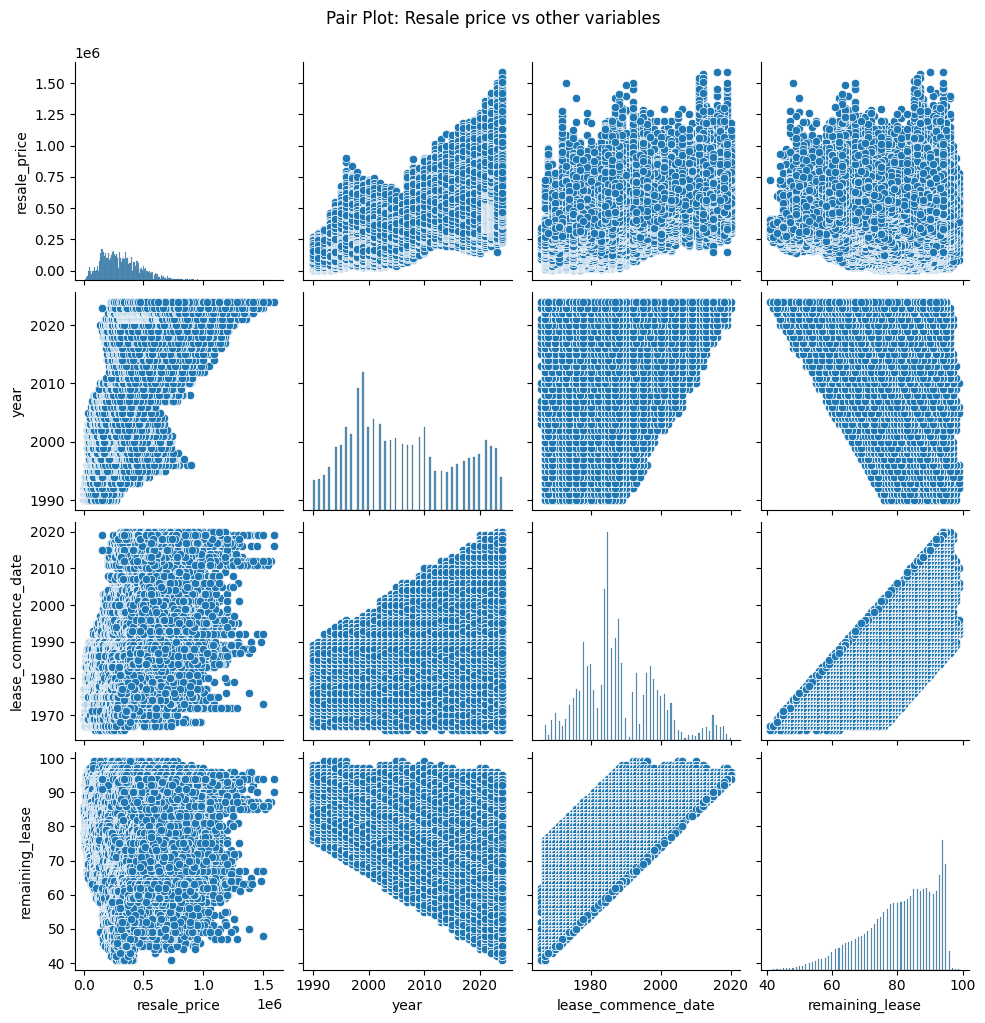

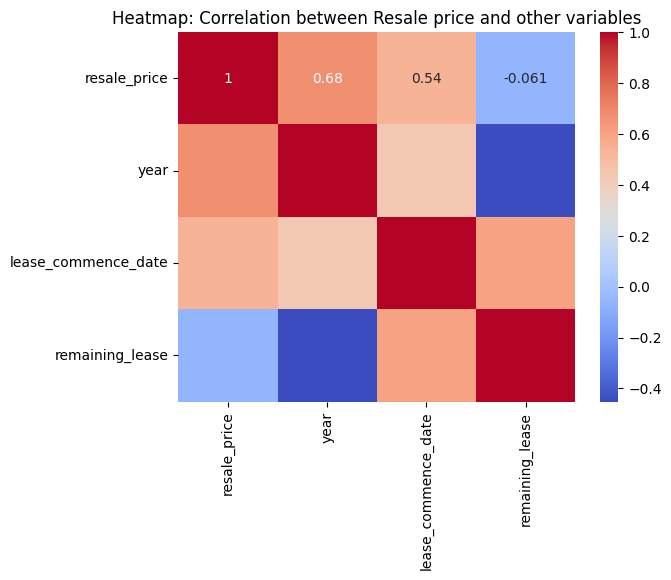

In [5]:
#Pairplot between Resale and othr respective numerical columns
sb.pairplot(df[['resale_price', 'year', 'lease_commence_date', 'remaining_lease']])
plt.suptitle('Pair Plot: Resale price vs other variables', y=1.02)
plt.show()

# Heatmap
sb.heatmap(df[['resale_price', 'year', 'lease_commence_date', 'remaining_lease']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation between Resale price and other variables')
plt.show()

In [4]:
# Feature & Target Selection
selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
                    'current_remaining_lease', 'years_holding', 'resale_price']
dftrain = df[selected_columns]
X = dftrain.drop('resale_price', axis=1)
y = dftrain['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [7]:
# Algorithm Selection
directory = {}
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42), 
    RandomForestRegressor(n_estimators=100, random_state=42),
    KNeighborsRegressor()]

# Model Evaluations 
for regressor in regressors:      
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', regressor)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    directory[regressor.__class__.__name__] = {
        'Algorithm': regressor.__class__.__name__,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R-squared (R2) Score': r2
    }
result_df = pd.DataFrame(list(directory.values()))
result_df

,Algorithm,Mean Absolute Error,Mean Squared Error,R-squared (R2) Score
0,LinearRegression,52276.990932,4.674626e+09,0.840002
1,DecisionTreeRegressor,20632.188290,9.586596e+08,0.967188
2,RandomForestRegressor,18468.185060,7.146842e+08,0.975539
3,KNeighborsRegressor,21334.266620,1.007403e+09,0.965520


In [5]:
# Choosing the best model in this case the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# save the model
model_filename = 'resale_price_prediction_randomforest.joblib'
joblib.dump(pipeline, model_filename)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Print or use the metrics as needed
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")